In [1]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import math
from math import *
import copy

In [2]:
%matplotlib inline

# Load Data

In [3]:
data_set = fetch_20newsgroups(subset='all')

In [7]:
len(data_set.data) #total data

18846

In [8]:
len(data_set.target_names) #total categories

20

# Find Out top 10 Groups

In [4]:
# calculate top 10 categories
names = list(data_set.target_names)
categorized_data = {}
for idx in data_set.target:
    if names[idx] in categorized_data:
        categorized_data[names[idx]] += 1
    else:
        categorized_data[names[idx]] = 1

top_categories = sorted(categorized_data, key=categorized_data.__getitem__, reverse=True)[:10]

In [5]:
top_data = fetch_20newsgroups(subset='all', categories=top_categories)

In [13]:
len(top_data.data) #total data of 10 groups

9917

In [14]:
len(top_data.target_names) #total categories

10

In [6]:
original_label = top_data.target

In [35]:
top_categories

['rec.sport.hockey',
 'soc.religion.christian',
 'rec.motorcycles',
 'rec.sport.baseball',
 'sci.crypt',
 'sci.med',
 'rec.autos',
 'comp.windows.x',
 'sci.space',
 'comp.os.ms-windows.misc']

In [36]:
categorized_data

{'alt.atheism': 799,
 'comp.graphics': 973,
 'comp.os.ms-windows.misc': 985,
 'comp.sys.ibm.pc.hardware': 982,
 'comp.sys.mac.hardware': 963,
 'comp.windows.x': 988,
 'misc.forsale': 975,
 'rec.autos': 990,
 'rec.motorcycles': 996,
 'rec.sport.baseball': 994,
 'rec.sport.hockey': 999,
 'sci.crypt': 991,
 'sci.electronics': 984,
 'sci.med': 990,
 'sci.space': 987,
 'soc.religion.christian': 997,
 'talk.politics.guns': 910,
 'talk.politics.mideast': 940,
 'talk.politics.misc': 775,
 'talk.religion.misc': 628}

In [37]:
data_dist = {}
for it in top_categories:
    data_dist[it] = categorized_data[it]

In [38]:
data_dist

{'comp.os.ms-windows.misc': 985,
 'comp.windows.x': 988,
 'rec.autos': 990,
 'rec.motorcycles': 996,
 'rec.sport.baseball': 994,
 'rec.sport.hockey': 999,
 'sci.crypt': 991,
 'sci.med': 990,
 'sci.space': 987,
 'soc.religion.christian': 997}

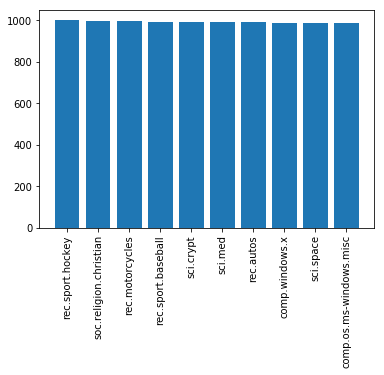

In [41]:
plt.bar(range(len(data_dist)), list(data_dist.values()), align='center')
plt.xticks(range(len(data_dist)), list(data_dist.keys()))
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.show()

# Word Vectorization

In [64]:
word_vectorizer = CountVectorizer(max_df=0.5, max_features=100000, min_df=2, stop_words='english', analyzer='word', ngram_range=(1, 1))

In [65]:
word_vectorized = word_vectorizer.fit_transform(top_data.data)

In [26]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.5, max_features = 100000, min_df = 2, stop_words = 'english', use_idf = True)

In [27]:
tfidf_vectorized = tfidf_vectorizer.fit_transform(top_data.data)

In [28]:
word_vectorized = tfidf_vectorized.toarray()

In [29]:
tfidf_vectorized.shape

(9917, 1000)

# Use Traditional Kmeans

In [17]:
# Try to find out which vectorizer can work better

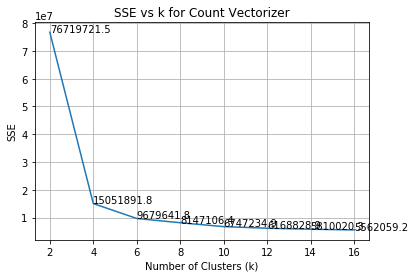

In [66]:
sse_score_cnt = {}
for k in range(2, 18, 2):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, verbose=False)
    km.fit(word_vectorized)
    sse_score_cnt[k] = km.inertia_


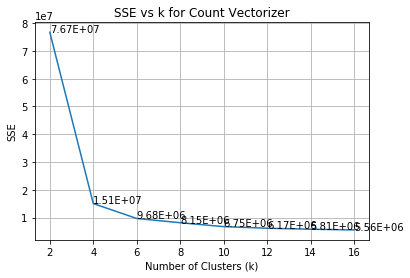

In [67]:
fig, ax = plt.subplots()
ax.plot(list(sse_score_cnt.keys()), list(sse_score_cnt.values()))
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("SSE")
ax.set_title("SSE vs k for Count Vectorizer")
for i, txt in enumerate(sse_score_cnt.values()):
    ax.annotate("{0:.2E}".format(txt), (list(sse_score_cnt.keys())[i], list(sse_score_cnt.values())[i]))
plt.grid(True)
plt.show()

In [25]:
sse_score

{2: 76954695.88831052,
 4: 17194780.18855999,
 6: 9162538.521888193,
 8: 8490893.877652852,
 10: 6870881.464730402,
 12: 6609593.99226149,
 14: 6105776.609227422,
 16: 5308105.204192618}

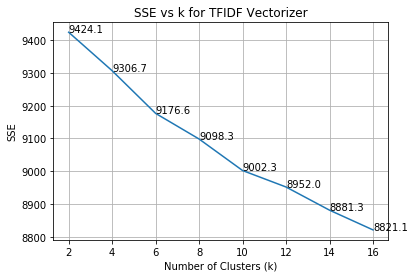

In [62]:
sse_score = {}
for k in range(2, 18, 2):
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1, verbose=False)
    km.fit(tfidf_vectorized)
    sse_score[k] = km.inertia_

fig, ax = plt.subplots()
ax.plot(list(sse_score.keys()), list(sse_score.values()))
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("SSE")
ax.set_title("SSE vs k for TFIDF Vectorizer")
for i, txt in enumerate(sse_score.values()):
    ax.annotate("{0:.1f}".format(txt), (list(sse_score.keys())[i], list(sse_score.values())[i]))
plt.grid(True)
plt.show()

In [27]:
sse_score

{2: 9775.662275731229,
 4: 9725.594514013545,
 6: 9674.598315779887,
 8: 9649.68832471925,
 10: 9621.64109417287,
 12: 9589.444181487377,
 14: 9573.802622960684,
 16: 9544.451504953931}

# K-Means Implementation

In [11]:
# for choosing k number of centroids from given dataset randomly
def choose_random_centroids(data, k):
    n_samples, n_features = np.shape(data)
    centroids = np.zeros((k, n_features))
    for i in range(k):
        centroid = data[np.random.choice(range(n_samples))]
        centroids[i] = centroid
    return centroids

In [12]:
# calculates euclidean distance between 2 vectors
def calculate_euclidean_distance(x1, x2):
    """
    Calculates euclidean distance
    """
    distance = 0
    for i in range(len(x1)):
        distance += pow((x1[i] - x2[i]), 2)
    return distance

In [13]:
# determines the nearest centroid for a sample data point
def find_nearest_centroid(sample, centroids):
    nearest_cent = 0
    nearest_dist = float('inf')
    for i, centroid in enumerate(centroids):
        distance = calculate_euclidean_distance(sample, centroid)
        if distance < nearest_dist:
            nearest_cent = i
            nearest_dist = distance
    return nearest_cent

In [14]:
# creating clusters assigning the data points to it nearest centroids
def create_clusters(centroids, data, k):
    n_samples = np.shape(data)[0]
    clusters = []
    for i in range(k):
        clusters.append([])
    for sample_i, sample in enumerate(data):
        centroid_i = find_nearest_centroid(sample, centroids)
        clusters[centroid_i].append(sample_i)
    return clusters

In [15]:
# calculate the centroids of a given cluster by taking its mean
def calculate_centroids(clusters, data, num_k):
    features = np.shape(data)[1]
    centroids = np.zeros((num_k, features))
    for idx, cluster in enumerate(clusters):
        centroid = np.mean(data[cluster], axis=0)
        centroids[idx] = centroid
    return centroids

In [16]:
# assign lables to the points of the clusters
def get_cluster_labels(clusters, data):
    y_pred = np.zeros(np.shape(data)[0])
    for cluster_i, cluster in enumerate(clusters):
        for sample_i in cluster:
            y_pred[sample_i] = cluster_i
    return y_pred

In [17]:
# applying k-means on a given dataset
def apply_k_means(data, num_k, max_iter):
    centroids = choose_random_centroids(data, num_k)
    for iter in range(max_iter):
        clusters = create_clusters(centroids, data, num_k)
        prev_centroids = centroids
        centroids = calculate_centroids(clusters, data, num_k)
        difference = centroids - prev_centroids
        
        if not difference.any():
            break
    return get_cluster_labels(clusters, data), centroids

# SSE and Entropy Calculation

In [18]:
"""
Calculating SSE taking the sum of the squared distance of each datapoint from its cluster's centroid
"""
def calculate_sse(data, predicted_cluster, predicted_centroids, num_k):
    sse = 0
    for item in range(len(predicted_cluster)):
        k = 0
        while k <= num_k:
            if predicted_cluster[item] == k:
                sse += calculate_euclidean_distance(data[item], predicted_centroids[k])
                break
            k += 1
    return sse

In [19]:
"""
Calcultaes entropy of the clustering. First it creates distribution of classes for each cluster, then it clacultaes entropy for each cluster summing up the probability of
each class mulitplied by the log of the that probability. Finally the weighted average of the entropy over the clusters is measured. 
"""
def calculate_entropy(original_label, predicted_lables, num_k):
    unique_labels, counts_labels = np.unique(original_label, return_counts=True)
    original_label_count = dict.fromkeys(unique_labels, 0)
    label_count_list = [copy.deepcopy(original_label_count) for i in range(num_k)]
    total_data = len(original_label)

    for idx in range(len(predicted_lables)):
        label_count_list[int(predicted_lables[idx])][int(original_label[idx])] += 1

    total_entropy = 0
    for item in label_count_list:
        cluster_entropy = 0
        weighted_entropy = 0
        item_sum = sum(item.values())
        for key, value in item.items():
            try:
                div_value = float(value / item_sum)
            except ValueError as e:
                div_value = 0
            try:
                log_value = log(div_value, 2)
            except ValueError as e:
                log_value = 0
            mul_value = (-1) * div_value * log_value
            cluster_entropy += mul_value
        weighted_entropy = cluster_entropy * (item_sum / total_data)
        total_entropy += weighted_entropy

    return total_entropy

# Applying k-Means

In [70]:
tfidf_vectorizer = TfidfVectorizer(max_df = 0.5, max_features = 1000, min_df = 2, stop_words = 'english', use_idf = True)
tfidf_vectorized = tfidf_vectorizer.fit_transform(top_data.data)
word_vectorized = tfidf_vectorized.toarray()

for k= 2 completed
for k= 4 completed
for k= 6 completed
for k= 8 completed
for k= 10 completed
for k= 12 completed
for k= 14 completed
for k= 16 completed


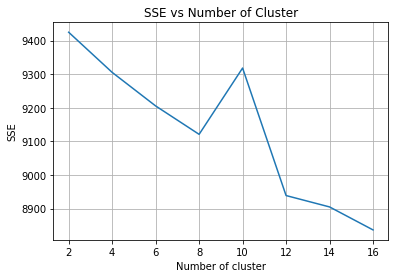

In [33]:
sse_score_or = {}
entropy_sc = {}
for k in range(2, 18, 2):
    prediction, centroid = apply_k_means(word_vectorized, k, 100)
    sse_score_or[k] = calculate_sse(word_vectorized, prediction, centroid, k)
    entropy_sc[k] = calculate_entropy(original_label, prediction, k)
    print("for k= " + str(k) + " completed")

plt.figure()
plt.plot(list(sse_score_or.keys()), list(sse_score_or.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.title("SSE vs Number of Cluster")
plt.grid(True)
plt.show()

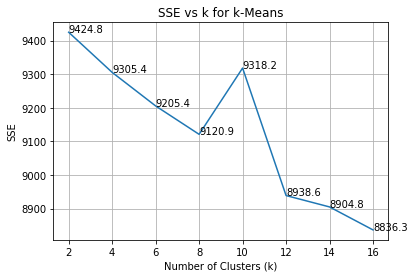

In [61]:
fig, ax = plt.subplots()
ax.plot(list(sse_score_or.keys()), list(sse_score_or.values()))
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("SSE")
ax.set_title("SSE vs k for k-Means")
for i, txt in enumerate(sse_score_or.values()):
    ax.annotate("{0:.1f}".format(txt), (list(sse_score_or.keys())[i], list(sse_score_or.values())[i]))
plt.grid(True)
plt.show()

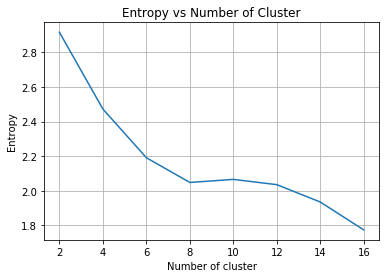

In [34]:
plt.figure()
plt.plot(list(entropy.keys()), list(entropy.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Entropy")
plt.title("Entropy vs Number of Cluster")
plt.grid(True)
plt.show()

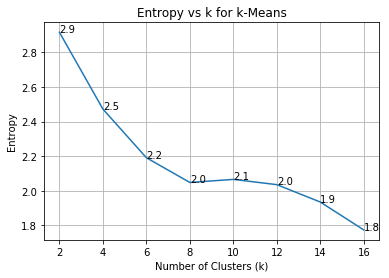

In [60]:
fig, ax = plt.subplots()
ax.plot(list(entropy.keys()), list(entropy.values()))
ax.set_xlabel("Number of Clusters (k)")
ax.set_ylabel("Entropy")
ax.set_title("Entropy vs k for k-Means")
for i, txt in enumerate(entropy.values()):
    ax.annotate("{0:.1f}".format(txt), (list(entropy.keys())[i], list(entropy.values())[i]))
plt.grid(True)
plt.show()